<a href="https://colab.research.google.com/github/Many98/real_estate/blob/models/notebooks/results_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -U pandas-profiling

In [3]:
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import string

In [23]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/result.csv', sep=',', delimiter=None, encoding="utf8")

In [24]:
df.columns

Index(['price', 'price_m2', 'xgb', 'gp', 'usable_area', 'ownership',
       'city_district', 'subway_station_dist', 'energy_effeciency',
       'disposition', 'description'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7198 entries, 0 to 7197
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7198 non-null   float64
 1   price_m2             7198 non-null   float64
 2   xgb                  7198 non-null   float64
 3   gp                   7198 non-null   float64
 4   usable_area          7198 non-null   float64
 5   ownership            7198 non-null   object 
 6   city_district        7198 non-null   object 
 7   subway_station_dist  7198 non-null   float64
 8   energy_effeciency    7198 non-null   object 
 9   disposition          7198 non-null   object 
 10  description          7198 non-null   object 
dtypes: float64(6), object(5)
memory usage: 618.7+ KB


In [26]:
df.describe(include='all')

,price,price_m2,xgb,gp,usable_area,ownership,city_district,subway_station_dist,energy_effeciency,disposition,description
count,7.198000e+03,7198.000000,7.198000e+03,7.198000e+03,7198.000000,7198,7198,7198.000000,7198,7198,7198
unique,NaN,NaN,NaN,NaN,NaN,4,53,NaN,8,13,7194
top,NaN,NaN,NaN,NaN,NaN,Osobní,Praha 5,NaN,G,2+kk,Nabízíme prémiové moderní bydlení ve skvělé lo...
freq,NaN,NaN,NaN,NaN,NaN,6149,760,NaN,2034,2144,2
mean,8.938960e+06,130606.589020,8.947093e+06,8.651355e+06,69.837594,NaN,NaN,1009.961500,NaN,NaN,NaN
std,5.355788e+06,35490.719433,5.258164e+06,4.965729e+06,36.464892,NaN,NaN,1117.005328,NaN,NaN,NaN
min,1.190000e+06,41161.048689,1.319109e+06,1.425317e+06,11.000000,NaN,NaN,-999.000000,NaN,NaN,NaN
25%,5.850000e+06,104456.293706,5.906086e+06,5.665477e+06,47.000000,NaN,NaN,365.000000,NaN,NaN,NaN
50%,7.400000e+06,126440.613027,7.391924e+06,7.541948e+06,63.000000,NaN,NaN,728.000000,NaN,NaN,NaN
75%,1.049000e+07,151025.641026,1.038929e+07,1.004854e+07,83.000000,NaN,NaN,1450.500000,NaN,NaN,NaN


Pandas profilling did not provided any hints

In [ ]:
# profile = ProfileReport(df, title='Reality results', html={'style':{'full_width':True}})
# profile.to_notebook_iframe()

In [27]:
df_results = df.copy()

In [28]:
df_results.columns

Index(['price', 'price_m2', 'xgb', 'gp', 'usable_area', 'ownership',
       'city_district', 'subway_station_dist', 'energy_effeciency',
       'disposition', 'description'],
      dtype='object')

## Setting up the differences in predicted and real prices

In [29]:
df_results['xgb_diff'] = df_results['xgb'] - df_results['price']
df_results['gp_diff'] = df_results['gp'] - df_results['price']

E.g. positive values means overvaluation and negative undervaluation 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:382: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


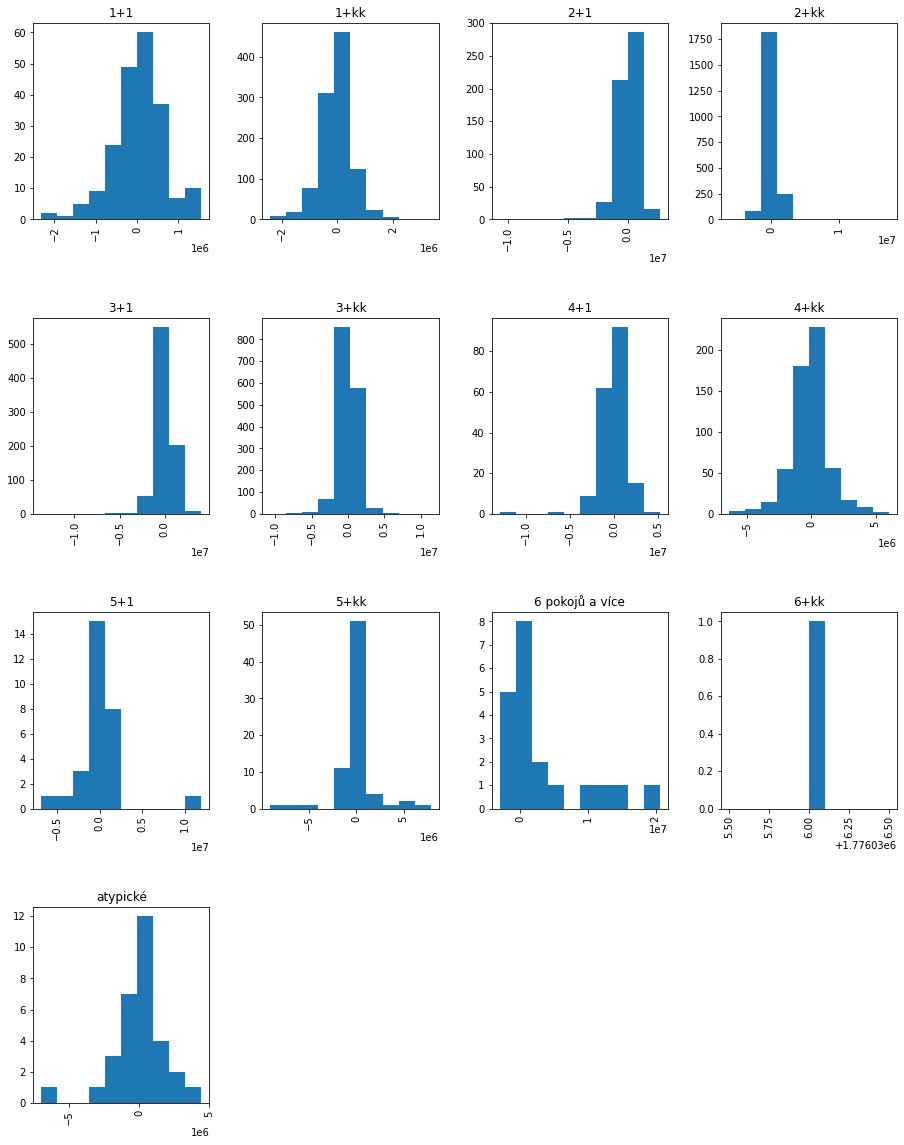

In [30]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_results['xgb_diff'].hist(by=df_results['disposition'], ax = ax)
plt.show()

6>= rooms and 6+kk seems to be overvaluated in XGBoost.

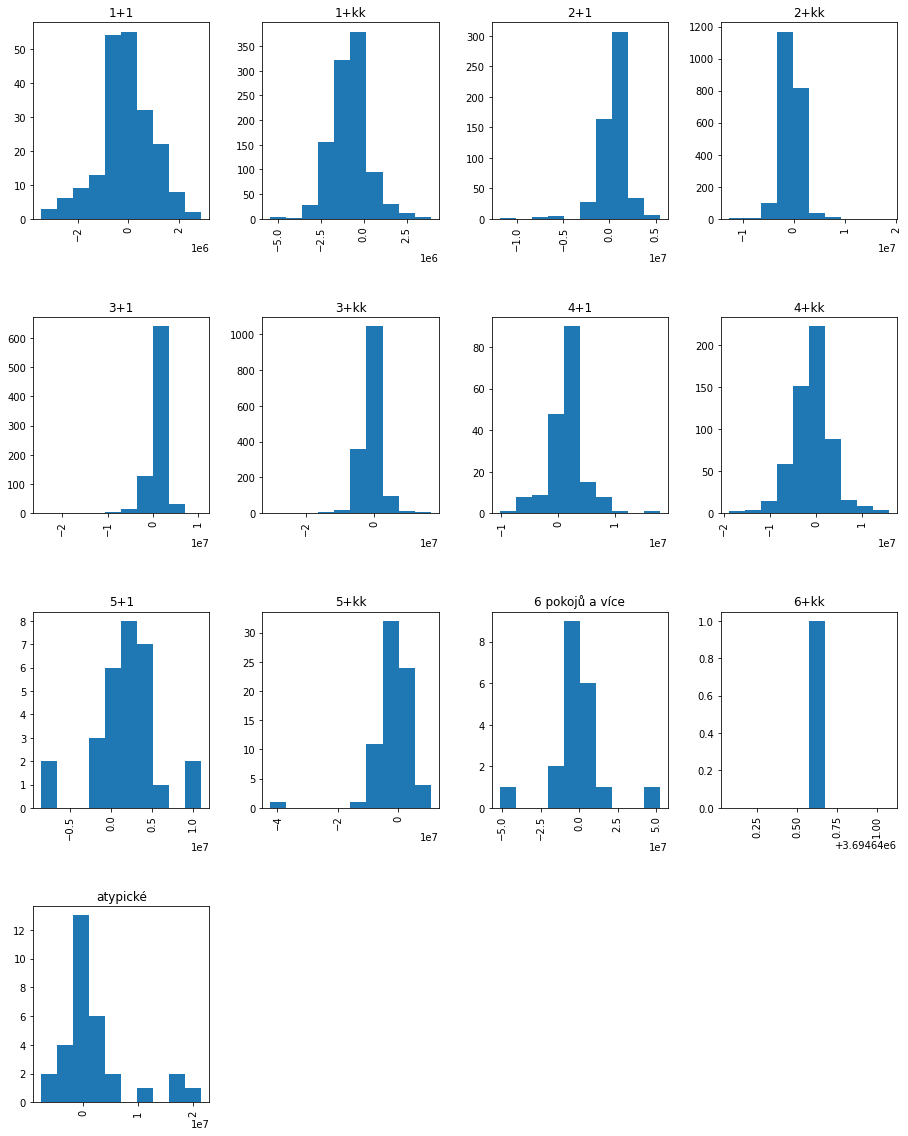

In [31]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_results['gp_diff'].hist(by=df_results['disposition'], ax = ax)
plt.show()

Atypical disposition has some problems in GP.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:382: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


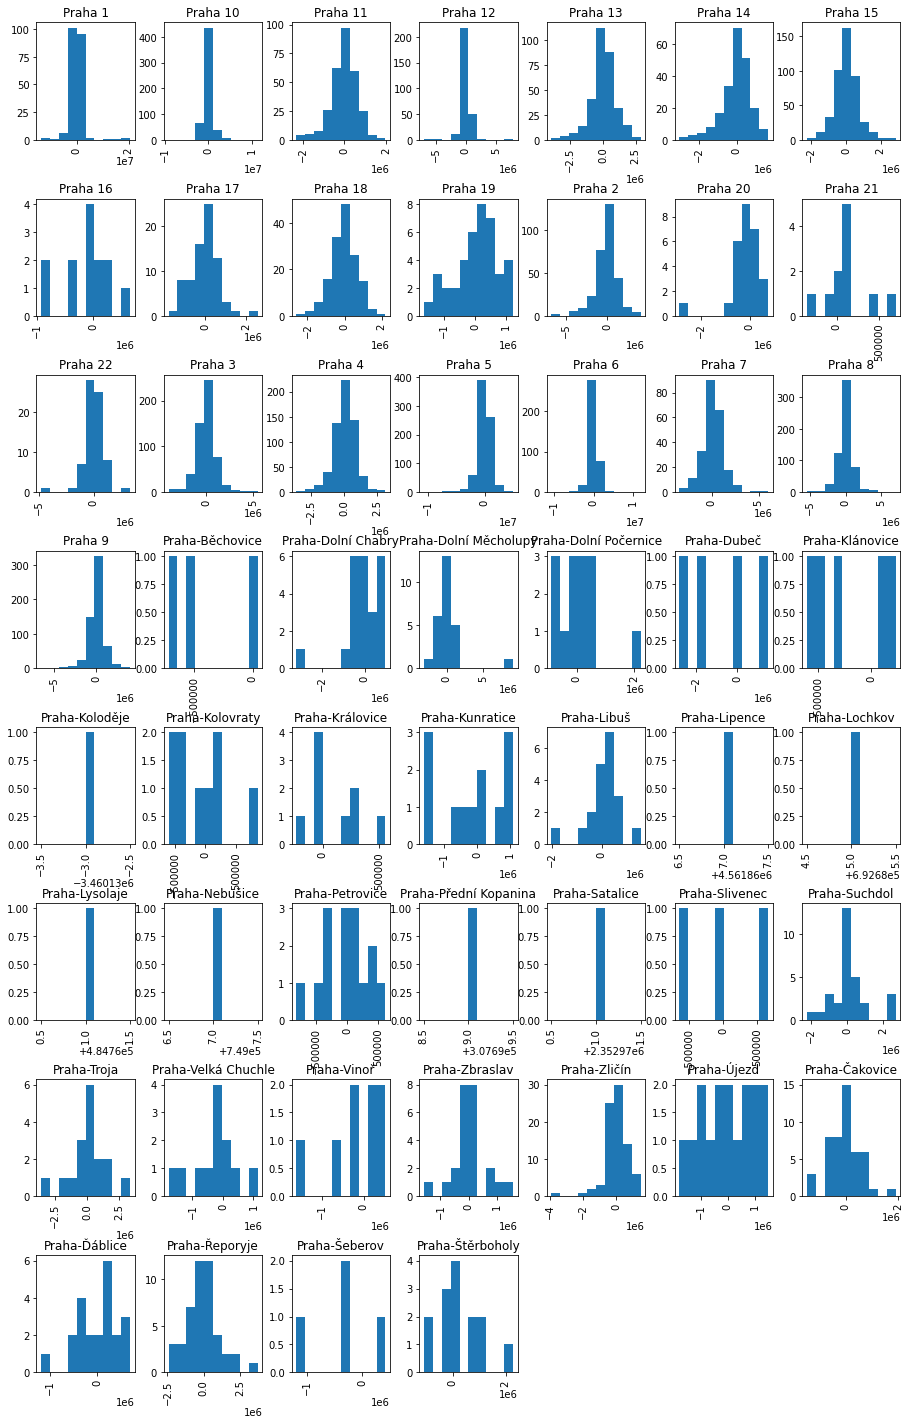

In [39]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
df_results['xgb_diff'].hist(by=df_results['city_district'], ax = ax)
plt.show()

City districts seems OK for XGBoost

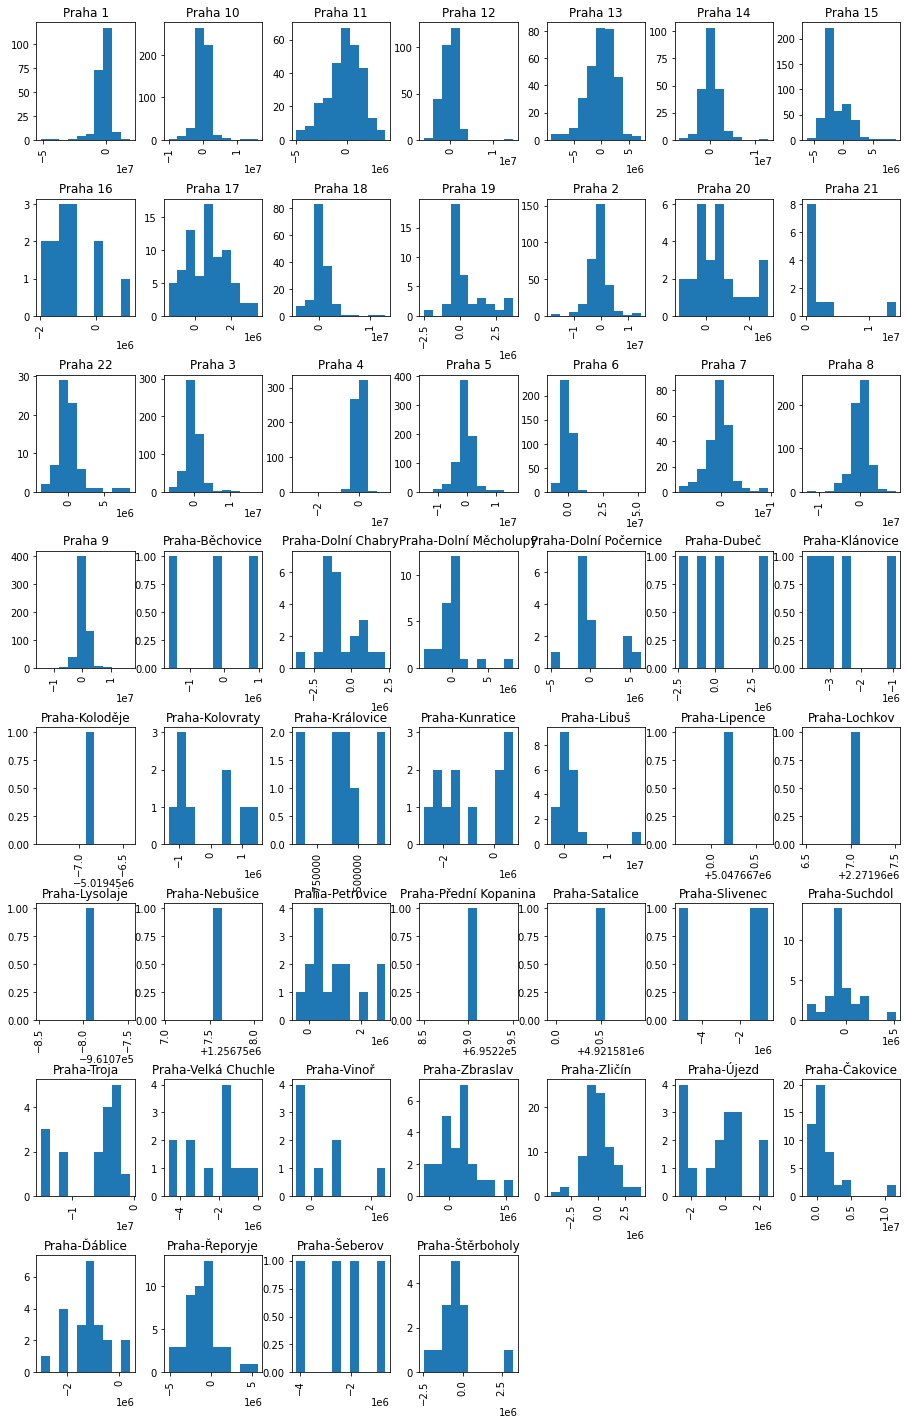

In [40]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
df_results['gp_diff'].hist(by=df_results['city_district'], ax = ax)
plt.show()

City district seems to have some impact for GP:
Undervaluation for Praha-Šeberov, Praha-Ďáblice, Praha-Velká Chuchle, Praha-Troja, Praha-Klánovice

Overvaluation for Praha-Čakovice, Praha-Zbraslav, Praha-Petrovice, Praha 17 maybe even Praha 20

For XGBoost there is no significant differences.

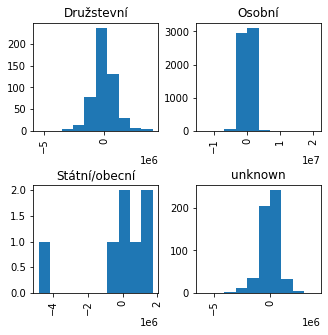

In [34]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
df_results['xgb_diff'].hist(by=df_results['ownership'], ax = ax)
plt.show()

Seems OK

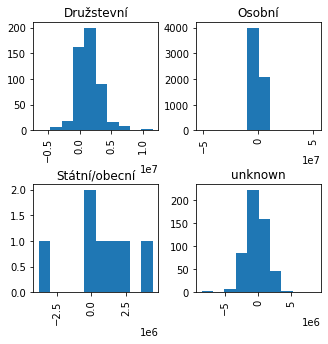

In [41]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
df_results['gp_diff'].hist(by=df_results['ownership'], ax = ax)
plt.show()

For GP we can see slight shift towards overvaluation for Družstevní ownership.

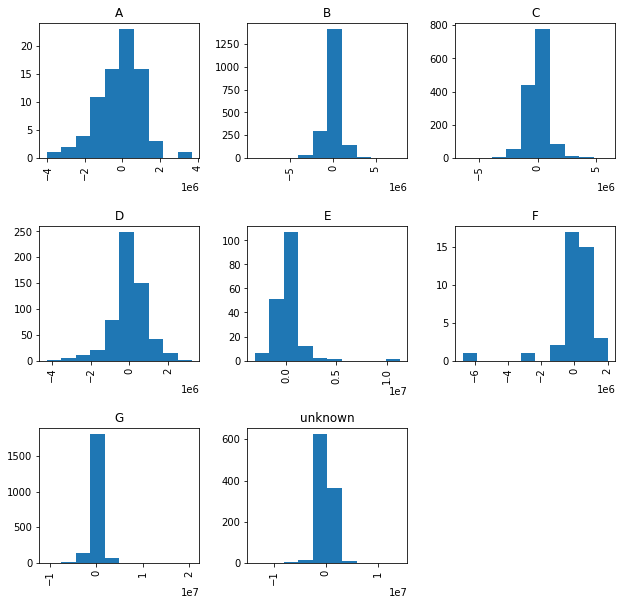

In [69]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_results['xgb_diff'].hist(by=df_results['energy_effeciency'], ax = ax)
plt.show()

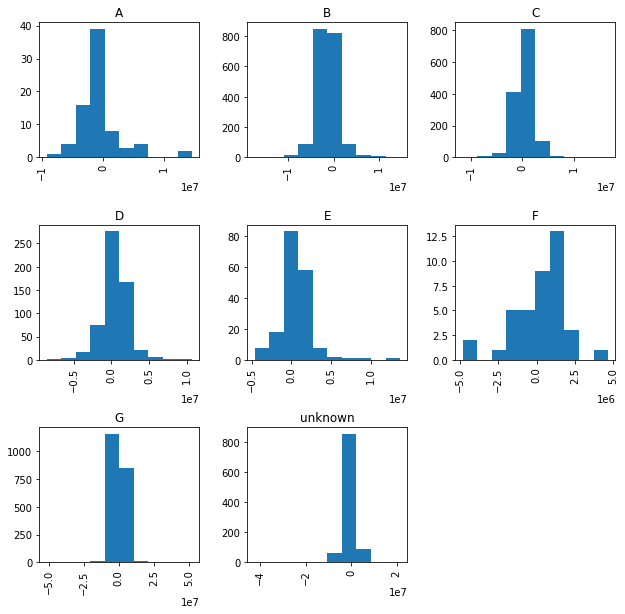

In [70]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_results['gp_diff'].hist(by=df_results['energy_effeciency'], ax = ax)
plt.show()

Maybe some small shift towards overvaluation for GP in energy_effeciency = F

## Numerical check of results based on properties 

In [42]:
properties = ['ownership', 'city_district', 'energy_effeciency', 'disposition']

In [43]:
def des_properties(df, properties, price_diff):
  for property in properties:
    print(property)
    print(df.groupby(property).describe()[price_diff])

In [44]:
des_properties(df_results, properties, 'xgb_diff')

ownership
                count           mean           std         min       25%  \
ownership                                                                  
Družstevní      509.0    5637.502358  9.729195e+05  -5431921.0 -477490.0   
Osobní         6149.0   11376.791901  1.178250e+06 -13698996.0 -439034.0   
Státní/obecní     7.0 -109042.357143  2.218523e+06  -4793667.0 -248990.5   
unknown         533.0  -25358.852720  9.051437e+05  -6084416.0 -401791.0   

                    50%        75%         max  
ownership                                       
Družstevní      30529.0   454850.0   4078622.0  
Osobní          43011.5   497435.5  20615400.0  
Státní/obecní  360339.0  1219007.5   1729997.5  
unknown         34981.0   475370.0   4030963.0  
city_district
                       count          mean           std         min  \
city_district                                                          
Praha 1                212.0  1.545747e+04  3.025468e+06 -13698996.0   
Praha 10 

XGB_boost seems to have some problems with 6>= rooms and 6+kk. But that might be done by wide spread of data. 

In [38]:
des_properties(df_results, properties, 'gp_diff')

ownership
                count          mean           std           min           25%  \
ownership                                                                       
Družstevní      509.0  1.446147e+06  1.961521e+06 -6.454123e+06  2.849261e+05   
Osobní         6149.0 -4.390959e+05  2.831718e+06 -5.156615e+07 -1.540915e+06   
Státní/obecní     7.0  7.199917e+05  2.563203e+06 -3.780088e+06 -1.927324e+05   
unknown         533.0 -2.088330e+05  1.763769e+06 -8.555059e+06 -1.163355e+06   

                        50%           75%           max  
ownership                                                
Družstevní     1.243293e+06  2.351933e+06  1.156448e+07  
Osobní        -3.159281e+05  8.472424e+05  5.229619e+07  
Státní/obecní  7.976720e+05  1.980573e+06  4.446678e+06  
unknown       -2.955816e+05  8.578100e+05  8.724672e+06  
city_district
                       count          mean           std           min  \
city_district                                                      

Price differences based on ownership seems to have bigger dispersion in GP than in XGBoost.

GP for disposition seems to overvalue 2+1, 3+1, 4+1 and 5+1, that might be influenced by position of those apartments.

In [45]:
disp_over_gp = ['2+1', '3+1', '4+1', '5+1']

In [66]:
def checking(df, names):
  for name in names:
    print(name)
    print(df[df['disposition'] == name].groupby(['city_district']).size())


In [67]:
checking(df_results, disp_over_gp)

2+1
city_district
Praha 1                   19
Praha 10                 122
Praha 11                   5
Praha 12                  21
Praha 13                   5
Praha 14                  15
Praha 15                  12
Praha 17                   1
Praha 18                  10
Praha 19                   2
Praha 2                   35
Praha 20                   3
Praha 22                   5
Praha 3                   52
Praha 4                   67
Praha 5                   34
Praha 6                   64
Praha 7                   12
Praha 8                   37
Praha 9                   16
Praha-Běchovice            1
Praha-Dolní Počernice      1
Praha-Královice            2
Praha-Libuš                1
Praha-Suchdol              1
Praha-Čakovice             3
dtype: int64
3+1
city_district
Praha 1                25
Praha 10               85
Praha 11               42
Praha 12               34
Praha 13               47
Praha 14               30
Praha 15               19
Praha 16       